# Beta Bank Modelo Predictivo

# Descripción del proyecto

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

# Instrucciones del proyecto

1. Descarga y prepara los datos.  Explica el procedimiento.

2. Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.

3. Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.

4. Realiza la prueba final

## Descarga y prepara los datos.  Explica el procedimiento.

In [1]:
##Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,f1_score
from matplotlib import pyplot as plt
## Modelo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
## Modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
## Modelo LogisticRegression
from sklearn.linear_model import LogisticRegression
##funcion shuffle
from sklearn.utils import shuffle
##métrica Auc-roc
from sklearn.metrics import roc_auc_score
##curva roc
from sklearn.metrics import roc_curve

In [2]:
## Cargas los datos
df_beta = pd.read_csv('/datasets/Churn.csv')

In [3]:
## Visualizar los datos 
df_beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
## Datos no nulos incompletos de la columna "Tenure"
## Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
print(df_beta['Tenure'].value_counts())
print(df_beta['Tenure'].value_counts().sum())
print('\n')
print(df_beta[df_beta['Tenure'].isna()])

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64
9091


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
30           31    15589475    Azikiwe          591     Spain  Female   39   
48           49    15766205        Yin          550   Germany    Male   38   
51           52    15768193  Trevisani          585   Germany    Male   36   
53           54    15702298   Parkhill          655   Germany    Male   41   
60           61    15651280     Hunter          742   Germany    Male   35   
...         ...         ...        ...          ...       ...     ...  ...   
9944       9945    15703923    Cameron          744   Germany    Male   41   
9956       9957    15707861      Nucci          520    France  Female   46   
9964       9965    15642785    Douglas          479    France    Male   34   
9985       9986    15586914     Nepean          659   

In [5]:
## Dejaremos los valores ausentes en -1 para conservar la clase float
df_beta['Tenure'] = df_beta['Tenure'].fillna(-1)
print(df_beta['Tenure'].value_counts())
df_beta.info()

 1.0     952
 2.0     950
 8.0     933
 3.0     928
 5.0     927
 7.0     925
-1.0     909
 4.0     885
 9.0     882
 6.0     881
 10.0    446
 0.0     382
Name: Tenure, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited        

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  

<b>Éxito</b> - Has cargado y explorado los datos correctamente, gestionando los valores ausentes de manera efectiva. Explicar cada paso reforzará aún más tu análisis. ¡Sigue así!  

</div>

## Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.


In [6]:
## Se verifica el total de 0 y 1 en la columna Exited
## Hay mayor prevalencia de 0 con 7963
print(df_beta['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


In [7]:
print(df_beta.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Se entrenan dos modelos donde en features se eliminan aquellas columnas que se considera que no aportan al análisis del modelo. Por una parte la columna target (Exited), RowNumber. CostumerId, y el Surname. Se utiliza get dummies para que las varibles categóricas puedan ser procesadas como binarias para que el modelo pueda procesarlas de manera correcta.

In [8]:
## DecisionTree con max_depth

features = df_beta.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1, errors='ignore')
features = pd.get_dummies(features,drop_first= True)
target = df_beta['Exited']


features_train,features_test,target_train,target_test = train_test_split(features,target, test_size= 0.25, random_state = 12345)


model = DecisionTreeClassifier(random_state= 12345,max_depth=10)

model.fit(features_train,target_train)

predictions_test= model.predict(features_test)

print('Precision : ',precision_score(target_test,predictions_test))
print('Recall : ',recall_score(target_test,predictions_test))
print('F1 : ', f1_score(target_test,predictions_test))

Precision :  0.654911838790932
Recall :  0.48598130841121495
F1 :  0.5579399141630902


In [9]:
## RandomForest con max_depth y n_estimators

features = df_beta.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1, errors='ignore')
features = pd.get_dummies(features,drop_first= True)
target = df_beta['Exited']


features_train,features_test,target_train,target_test = train_test_split(features,target, test_size= 0.25, random_state = 12345)


model = RandomForestClassifier(random_state= 12345,n_estimators=50,max_depth=10)

model.fit(features_train,target_train)

predictions_test= model.predict(features_test)

print('Precision : ',precision_score(target_test,predictions_test))
print('Recall : ',recall_score(target_test,predictions_test))
print('F1 : ', f1_score(target_test,predictions_test))

Precision :  0.8035087719298246
Recall :  0.4280373831775701
F1 :  0.5585365853658537


Se puede mejorar el recall para que sea mayor a 0.5 que fue el promedio de ambos modelos.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  

<b>Éxito</b> - Has identificado correctamente el desequilibrio en la variable objetivo y entrenado modelos de DecisionTree y RandomForest sin considerar este factor. La eliminación de columnas irrelevantes y el uso de `get_dummies()` para variables categóricas están bien implementados. Explorar técnicas para mejorar el recall será clave para optimizar la detección de la clase minoritaria. ¡Buen trabajo!  

</div>

## Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.

### Sobremuestreo

In [10]:
##Se realiza un sobremuestreo debido a que prevalece más el 0 que el uno y se quiere tener más presencia del 1 con la repetición con la que se multiplica
def upsample(features,target,repetition):
    features_zeros = features[target == 0]
    features_ones = features[target ==1]
    target_zeros = target[target == 0]
    target_ones = target[target ==1]
    
    features_upsampled = pd.concat ([features_zeros]+[features_ones]*repetition)
    target_upsampled = pd.concat ([target_zeros]+[target_ones]*repetition)
    
    features_upsampled,target_upsampled = shuffle(features_upsampled,target_upsampled,random_state=12345)
    
    return features_upsampled,target_upsampled

features_upsampled, target_upsampled = upsample(features_train,target_train,8)

print(target_upsampled.value_counts())

1    12016
0     5998
Name: Exited, dtype: int64


In [11]:
## Modelo DecisionTree con sobremuestreo
model = DecisionTreeClassifier(random_state= 12345,max_depth=10)

model.fit(features_upsampled,target_upsampled)

predictions_test= model.predict(features_test)
predictions_train= model.predict(features_train)

print('Test/Validación')
print('Precision : ',precision_score(target_test,predictions_test))
print('Recall : ',recall_score(target_test,predictions_test))
print('F1 : ', f1_score(target_test,predictions_test))

print('\n')

print('Entrenamiento')
print('Precision : ',precision_score(target_train,predictions_train))
print('Recall : ',recall_score(target_train,predictions_train))
print('F1 : ', f1_score(target_train,predictions_train))

Test/Validación
Precision :  0.40233236151603496
Recall :  0.7738317757009345
F1 :  0.5294117647058824


Entrenamiento
Precision :  0.47326732673267324
Recall :  0.9547270306258322
F1 :  0.6328331862312444


In [12]:
## Modelo RandomForest con sobremuestreo
model = RandomForestClassifier(random_state= 54321,n_estimators=18,max_depth=13,min_samples_split=2)

model.fit(features_upsampled,target_upsampled)

predictions_test= model.predict(features_test)
predictions_train= model.predict(features_train)

print('Test/Validación')
print('Precision : ',precision_score(target_test,predictions_test))
print('Recall : ',recall_score(target_test,predictions_test))
print('F1 : ', f1_score(target_test,predictions_test))

print('\n')

print('Entrenamiento')
print('Precision : ',precision_score(target_train,predictions_train))
print('Recall : ',recall_score(target_train,predictions_train))
print('F1 : ', f1_score(target_train,predictions_train))


Test/Validación
Precision :  0.5543964232488823
Recall :  0.6953271028037383
F1 :  0.6169154228855722


Entrenamiento
Precision :  0.7507507507507507
Recall :  0.9986684420772304
F1 :  0.8571428571428571


### Modificación de Umbral

In [13]:
## Modelo DecisionTree con sobremuestreo y modificación de su umbral
model = DecisionTreeClassifier(random_state= 12345,max_depth=15)

model.fit(features_upsampled,target_upsampled)

predictions_test= model.predict(features_test)
predictions_train= model.predict(features_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:,1]
print(probabilities_one_test)
best_score = 0
for threshold in np.arange(0,0.6,0.05):
    predicted_test = probabilities_one_test > threshold
    score = f1_score(target_test,predicted_test)
    #print('Test/Validación')
    #print ('Threshold', threshold)
    #print('Precision : ',precision_score(target_test,predicted_test))
    #print('Recall : ',recall_score(target_test,predicted_test))
    #print('F1 : ', f1_score(target_test,predicted_test))
    if score > best_score:
        best_score  = score
print('Test/Validación')
print ('Threshold', threshold)
print('Precision : ',precision_score(target_test,predicted_test))
print('Recall : ',recall_score(target_test,predicted_test))
print('F1 : ', best_score)
        
print('\n')        
print('\n')        
probabilities_train = model.predict_proba(features_train)
probabilities_one_train = probabilities_train[:,1]
print(probabilities_one_train)
best_score = 0
for threshold in np.arange(0,0.6,0.05):
    predicted_train = probabilities_one_train > threshold
    score = f1_score(target_train,predicted_train)
    #print('Test/Validación')
    #print ('Threshold', threshold)
    #print('Precision : ',precision_score(target_test,predicted_test))
    #print('Recall : ',recall_score(target_test,predicted_test))
    #print('F1 : ', f1_score(target_test,predicted_test))
    if score > best_score:
        best_score  = score

print('Entrenamiento')
print ('Threshold', threshold)
print('Precision : ',precision_score(target_train,predicted_train))
print('Recall : ',recall_score(target_train,predicted_train))
print('F1 : ', best_score)
        

[0.83870968 0.         0.         ... 0.         0.81927711 0.        ]
Test/Validación
Threshold 0.55
Precision :  0.42661179698216734
Recall :  0.5813084112149532
F1 :  0.49208860759493667




[0. 0. 0. ... 0. 0. 0.]
Entrenamiento
Threshold 0.55
Precision :  0.7102272727272727
Recall :  0.9986684420772304
F1 :  0.8301051466519092


In [14]:
## Modelo RandomForest con sobreajuste y modificación de umbral
model = RandomForestClassifier(random_state= 54321,n_estimators=20,max_depth=15)

model.fit(features_upsampled,target_upsampled)

predictions_test= model.predict(features_test)
predictions_train= model.predict(features_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:,1]
print(probabilities_one_test)
best_score = 0
for threshold in np.arange(0,0.6,0.05):
    predicted_test = probabilities_one_test > threshold
    score = f1_score(target_test,predicted_test)
    #print('Test/Validación')
    #print ('Threshold', threshold)
    #print('Precision : ',precision_score(target_test,predicted_test))
    #print('Recall : ',recall_score(target_test,predicted_test))
    #print('F1 : ', f1_score(target_test,predicted_test))
    if score > best_score:
        best_score  = score
print('Test/Validación')
print ('Threshold', threshold)
print('Precision : ',precision_score(target_test,predicted_test))
print('Recall : ',recall_score(target_test,predicted_test))
print('F1 : ', best_score)
        
print('\n')        
print('\n')        
probabilities_train = model.predict_proba(features_train)
probabilities_one_train = probabilities_train[:,1]
print(probabilities_one_train)
best_score = 0
for threshold in np.arange(0,0.6,0.05):
    predicted_train = probabilities_one_train > threshold
    score = f1_score(target_train,predicted_train)
    #print('Test/Validación')
    #print ('Threshold', threshold)
    #print('Precision : ',precision_score(target_test,predicted_test))
    #print('Recall : ',recall_score(target_test,predicted_test))
    #print('F1 : ', f1_score(target_test,predicted_test))
    if score > best_score:
        best_score  = score
print('Entrenamiento')
print ('Threshold', threshold)
print('Precision : ',precision_score(target_train,predicted_train))
print('Recall : ',recall_score(target_train,predicted_train))
print('F1 : ', best_score)

[0.45341346 0.13528221 0.04285714 ... 0.05       0.28324468 0.27787126]
Test/Validación
Threshold 0.55
Precision :  0.6497797356828194
Recall :  0.5514018691588785
F1 :  0.60543580131209




[0.00869565 0.12178063 0.09       ... 0.37305248 0.         0.04782609]
Entrenamiento
Threshold 0.55
Precision :  0.9352428393524284
Recall :  1.0
F1 :  0.9665379665379665


## Prueba final

In [15]:
# Inicializar mejores valores
best_accuracy = 0
best_est = 0
best_depth = 0
best_min_samples_split = 0

# Búsqueda de hiperparámetros
for est in range(1,21, 1):  # Probar con n_estimators en este rango
    for depth in range(1, 20):  # Probar con max_depth en este rango
        for min_samples_split in [2, 5, 10]:  # Probar con varios valores de min_samples_split
            model = RandomForestClassifier(
                random_state=54321,
                n_estimators=est,
                max_depth=depth,
                min_samples_split=min_samples_split
            )
            
            model.fit(features_upsampled,target_upsampled)

                        # Calcular accuracy en el conjunto de validación
            predictions_test= model.predict(features_test)
            predictions_train= model.predict(features_train)
            score_test = f1_score(target_test,predictions_test)
            score_train = f1_score(target_train,predictions_train)

            #print(f'est = {est}, depth = {depth}, min_samples_split = {min_samples_split}')
            #print("F1 en test:", score_test)
            #print("F1 en train:", score_train)

            # Actualizar los mejores hiperparámetros si se encuentra un mejor accuracy
            if score_test > best_accuracy:
                best_accuracy = score_test
                best_est = est
                best_depth = depth
                best_min_samples_split = min_samples_split

# Mostrar los mejores resultados
print('\n')
print("Mejor accuracy en f1:", best_accuracy)
print("Mejores hiperparámetros -> n_estimators:", best_est, ", max_depth:", best_depth, ", min_samples_split:", best_min_samples_split)




Mejor accuracy en f1: 0.6169154228855722
Mejores hiperparámetros -> n_estimators: 18 , max_depth: 13 , min_samples_split: 2


In [16]:
## modelo final resultado de evaluar hiperparametros
final_model = RandomForestClassifier(random_state=54321, n_estimators=best_est,
                                max_depth=best_depth, min_samples_split=best_min_samples_split)

final_model.fit(features_upsampled, target_upsampled)

predictions_test= final_model.predict(features_test)
predictions_train= final_model.predict(features_train)

print('Test/Validación')
print('Precision : ',precision_score(target_test,predictions_test))
print('Recall : ',recall_score(target_test,predictions_test))
print('F1 : ', f1_score(target_test,predictions_test))

print('\n')

print('Entrenamiento')
print('Precision : ',precision_score(target_train,predictions_train))
print('Recall : ',recall_score(target_train,predictions_train))
print('F1 : ', f1_score(target_train,predictions_train))


Test/Validación
Precision :  0.5543964232488823
Recall :  0.6953271028037383
F1 :  0.6169154228855722


Entrenamiento
Precision :  0.7507507507507507
Recall :  0.9986684420772304
F1 :  0.8571428571428571


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo en la optimización de los hiperparámetros del modelo. La estructura del código es clara y bien organizada. Continúa aplicando estas buenas prácticas en futuros análisis.  
</div>

## Métrica AUC-ROC

In [17]:
##Métrica para el modelo con los mejores hiperparámetros registrados anteriormente
auc_roc_test = roc_auc_score(target_test,predictions_test)# < escribe el código aquí >
auc_roc_train = roc_auc_score(target_train,predictions_train)# < escribe el código aquí >

print('AUC-ROC test',auc_roc_test)
print('AUC-ROC train' ,auc_roc_train)

AUC-ROC test 0.7715821264654824
AUC-ROC train 0.9578203830926331


In [18]:
# Modelo con hiperparámetros y con un umbral definido
##Métrica AUC-ROC para modelo con los mejores hiperparémetros y con el mejor umbral definido
threshold = 0.55  

final_model = RandomForestClassifier(random_state=54321, n_estimators=best_est,
                                     max_depth=best_depth, min_samples_split=best_min_samples_split)

final_model.fit(features_upsampled, target_upsampled)

# Obtener probabilidades en lugar de predicciones directas
probabilities_test = final_model.predict_proba(features_test)[:, 1]
probabilities_train = final_model.predict_proba(features_train)[:, 1]

# Evaluación con métricas que requieren etiquetas binarias
predictions_test_binary = (probabilities_test > threshold).astype(int)
predictions_train_binary = (probabilities_train > threshold).astype(int)

# Evaluación del modelo
print('Test/Validación')
print('Precision : ', precision_score(target_test, predictions_test_binary))
print('Recall : ', recall_score(target_test, predictions_test_binary))
print('F1 : ', f1_score(target_test, predictions_test_binary))
print('AUC-ROC : ', roc_auc_score(target_test, probabilities_test))  # Mantiene probabilidades

print('\nEntrenamiento')
print('Precision : ', precision_score(target_train, predictions_train_binary))
print('Recall : ', recall_score(target_train, predictions_train_binary))
print('F1 : ', f1_score(target_train, predictions_train_binary))
print('AUC-ROC : ', roc_auc_score(target_train, probabilities_train))


Test/Validación
Precision :  0.5884413309982487
Recall :  0.6280373831775701
F1 :  0.6075949367088607
AUC-ROC :  0.8402387576989845

Entrenamiento
Precision :  0.8085221143473571
Recall :  0.9980026631158455
F1 :  0.8933253873659118
AUC-ROC :  0.9983474296136884


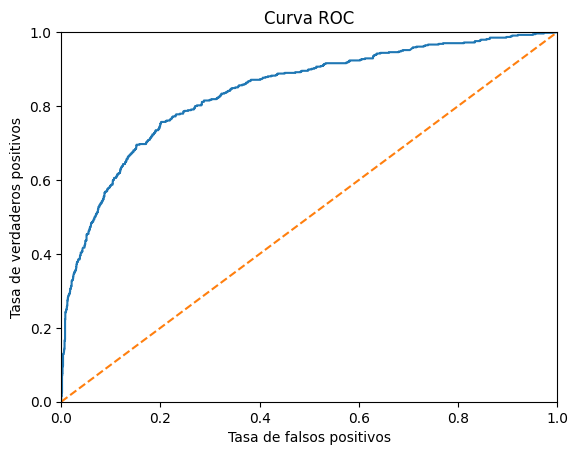

In [19]:
fpr, tpr, thresholds = roc_curve(target_test,probabilities_test)# < escribe el código aquí >

plt.figure()

plt.plot(fpr,tpr)# < traza la gráfica >

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1.0])# < utiliza las funciones plt.xlim() y plt.ylim() #para
plt.ylim([0,1.0])#   establecer el límite para los ejes de 0 a 1 >

plt.xlabel('Tasa de falsos positivos')# < utiliza las funciones plt.xlabel() y plt.ylabel() para
plt.ylabel('Tasa de verdaderos positivos')#   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">

plt.title('Curva ROC')# < agrega el encabezado "Curva ROC" con la función plt.title() >

plt.show()

## Descripción de los datos
Puedes encontrar los datos en el archivo  /datasets/Churn.csv file. Descarga el conjunto de datos.

Características

RowNumber: índice de cadena de datos

CustomerId: identificador de cliente único

Surname: apellido

CreditScore: valor de crédito

Geography: país de residencia

Gender: sexo

Age: edad

Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)

Balance: saldo de la cuenta

NumOfProducts: número de productos bancarios utilizados por el cliente

HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)

IsActiveMember: actividad del cliente (1 - sí; 0 - no)

EstimatedSalary: salario estimado

Objetivo

Exited: El cliente se ha ido (1 - sí; 0 - no)
Evaluación del proyecto
Hemos definido los criterios de evaluación para el proyecto. Lee esto con atención antes de pasar al ejercicio.

# Conclusión

La única modificación a los datos fue en la columna de Tenure debido a que había valores ausentes y se debía de agregar un valor para que fueran tomados en cuenta para las siguientes operaciones. Se procesaron todas aquellas características que fueran relevantes para analizar, se descartaron aquellas que no tuvieran una relación directa con las variables numéricas, como ejemplo, se encontraba el apellido de las personas registradas. El procedimiento de equilibrio de los datos fue realizado mediante dos técnicas, las cuales fueron el sobremuestreo y el cambio de umbral. Previamente se habían aplicado modelos de clasificación a los datos y se encontró que el desiquilibrió de clases afectaba a los valores de F1. Los modelos empleados en estos ejercicios fueron el DecisitionTreeClassifier y el RandomForestClassifier, los cuales mostraron los mejores resultados frente a otros modelos. Siendo el último utilizado para la prueba final. El valor F1 se mantuvo en 0.61. Aunque posteriormente se decidió juntar el sobremuestreo y el cambio de umbral,porque el primero balancea las clases para mejorar el aprendizaje del modelo y el segundo te permite controlar la precisión y el recall según lo que se necesite. Al tener AUC-ROC y F1-score altos el modelo no solo distingue bien las clases, sino que también hace predicciones balanceadas.